In [1]:
# %matplotlib widget
# Imports and setup
from pint import UnitRegistry
import math
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import sympy as sym

# Use pint
units = UnitRegistry()
units.default_format = "~P"
ureg = UnitRegistry()
ureg.setup_matplotlib()
Q_ = ureg.Quantity

#### Low Frequency Snubber
Selected components: 3.3 nF, 100 ohms

In [33]:
wd = 1.18 * units.megahertz
zeta_o = 0.00569
L = 17.3 * units.microhenry # Leakage
zeta_goal = 0.7

C = (1 / (wd * 2 * math.pi))**2 / L
print("C =", C.to("nanofarad"))

Csb = 3 * C
Rsb = 2*zeta_goal*np.sqrt(L/Csb)

print(f"The snubber capacitance should be {Csb.to('nanofarad')}, and the resistance should be {Rsb.to('ohm')}")

C = 1.0515505274124122 nF
The snubber capacitance should be 3.154651582237236 nF, and the resistance should be 103.6753206201365 Ω


### High Frequency Snubber
Selected components: 680 pF, 62 Ohm

In [32]:
wd = 10.5 * units.megahertz
zeta_o = 0.0207
L = 0.89 * units.microhenry # Leakage
zeta_goal = 0.8 # Modified slightly to get closer to available components

C = (1 / (wd * 2 * math.pi))**2 / L
print("C =", C.to("nanofarad"))

Csb = 2.5 * C # Modified slightly to get closer to available components
Rsb = 2*zeta_goal*np.sqrt(L/Csb)


print(f"The snubber capacitance should be {Csb.to('picofarad')}, and the resistance should be {Rsb.to('ohm')}")

C = 0.25814972010073567 nF
The snubber capacitance should be 645.3743002518393 pF, and the resistance should be 59.41678550007333 Ω


##### REDO

Capacitor 2.2 nF, 15 ohms

In [3]:
wd = 10.5 * units.megahertz
zeta_o = 0.0207
L = 0.26 * units.microhenry # Leakage
zeta_goal = 0.7 # Modified slightly to get closer to available components

C = (1 / (wd * 2 * math.pi))**2 / L
print("C =", C.to("nanofarad"))

Csb = 2.5 * C # Modified slightly to get closer to available components
Rsb = 2*zeta_goal*np.sqrt(L/Csb)


print(f"The snubber capacitance should be {Csb.to('nanofarad')}, and the resistance should be {Rsb.to('ohm')}")

C = 0.8836663495755952 nF
The snubber capacitance should be 2.2091658739389883 nF, and the resistance should be 15.187998540749081 Ω


#### Clamp 

Selected Components
R = 1500 Ohms
C = 0.1 uF

In [4]:
ipk = 5.04
fs = 50e3
Ts = 1/fs
L = 0.86e-6
Vo = 10
Vg = 18
Vmax = 60
a = 0.86

V = Vo / a
Vcp = Vmax/1.1 - Vg # Give a 10% margin
P_avg = ipk**2/(2*Ts) * L * 1/(1-(V/Vcp))
R = Vcp**2 / P_avg
C = 1/(R * 0.1) * (Ts - ipk*(L/(Vcp-V)))
print(f"For a resistance of {R * units.ohm}, we can have a Vcp of {Vcp * units.volt} \n with power of {P_avg * units.watt}")
print(f"Capacitance: {(C*units.farad).to_compact()}")

For a resistance of 1457.8830062662973 Ω, we can have a Vcp of 36.54545454545454 V 
 with power of 0.9161024870948583 W
Capacitance: 135.90919416241934 nF


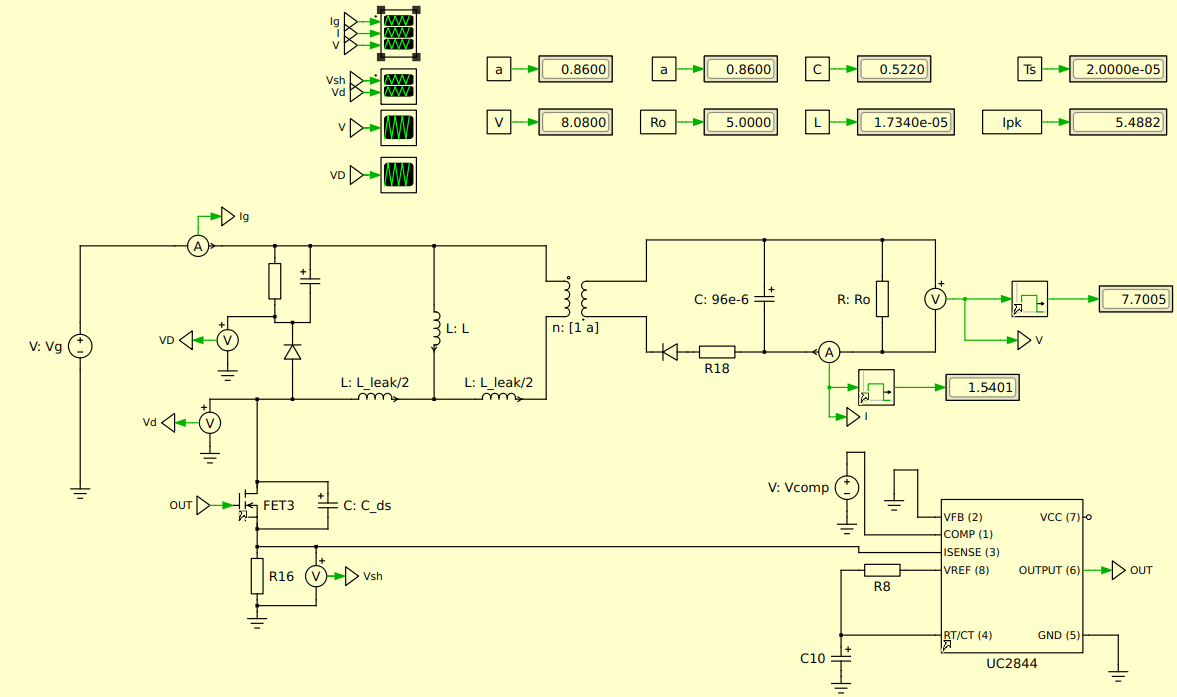